In [36]:
#%matplotlib widget
import csv
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.graph_objects as go
from scipy.signal import find_peaks
from scipy.signal import butter, filtfilt, lfilter

In [37]:
#Sicherheitsfunktion, falls ein Wert nicht in float umgewandelt werden kann
def safe_float_convert(x):
    try:
        return float(x)
    except ValueError:
        return None

# Versuch 1 LIS3DH

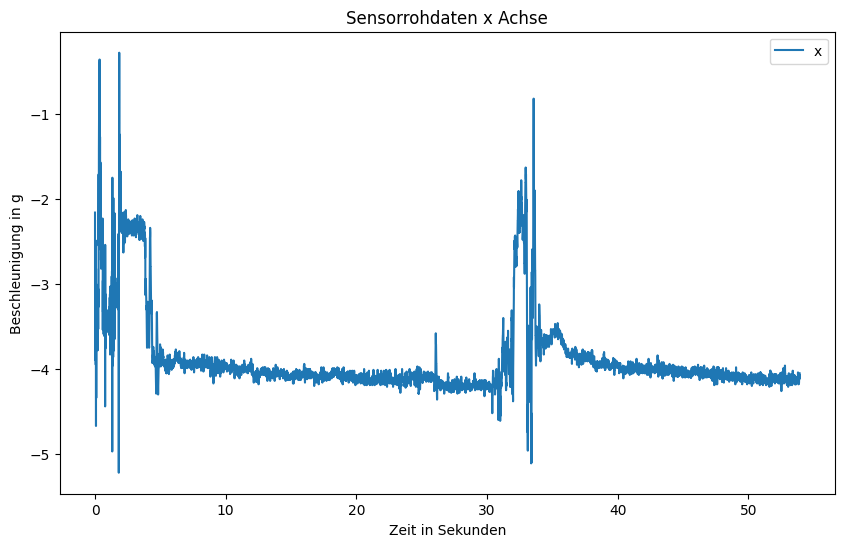

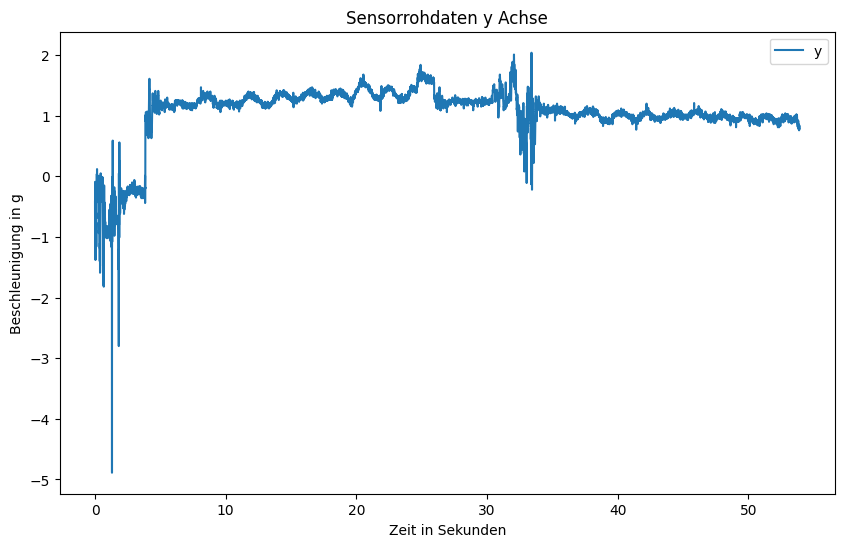

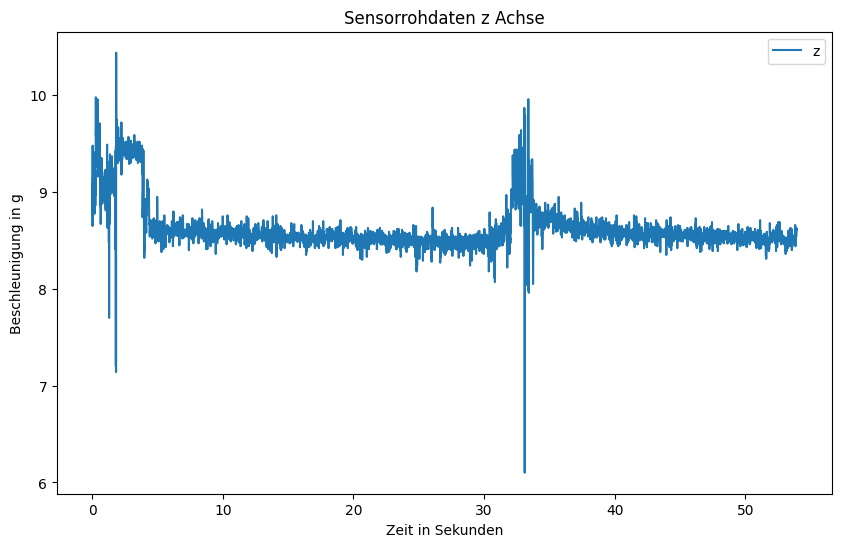

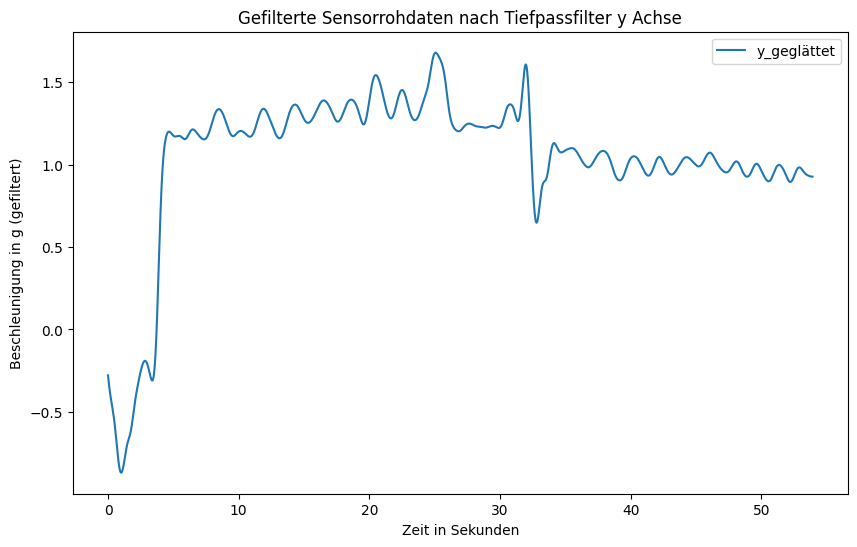

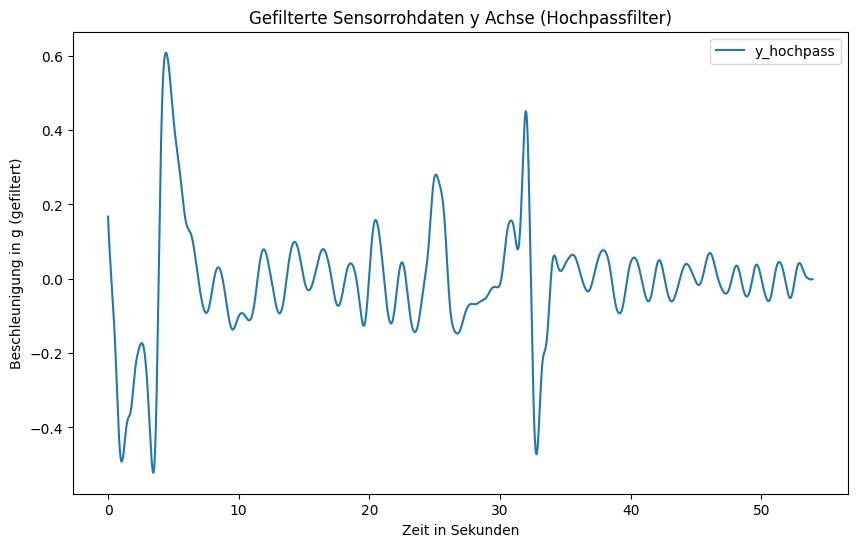

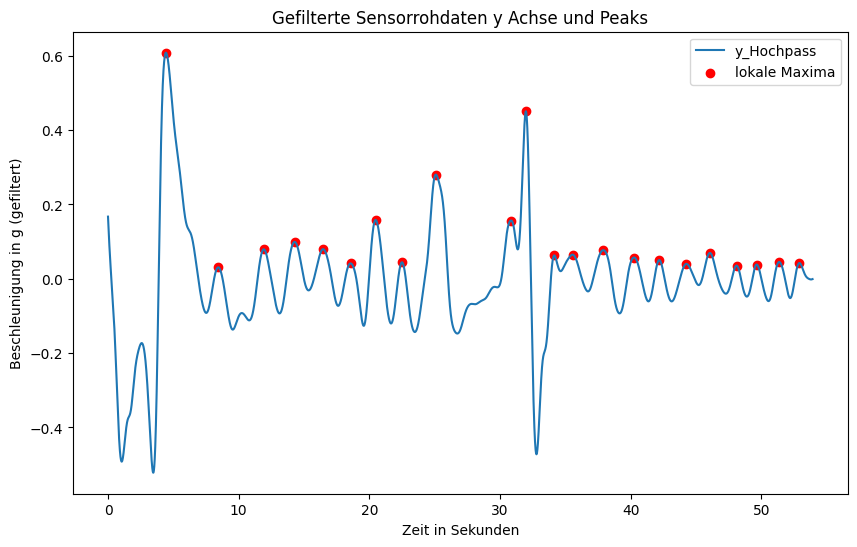

Atemfrequenz: 12.24 Atemzüge pro Minute


In [38]:


# Daten einlesen
#data = pd.read_csv('10MalEinAusBrust.csv', header=None, sep=';')
data= pd.read_csv('Messung/10MaleinausBrust.csv', header=None, sep=';')
data.columns = ['x', 'y', 'z']

# Zugriff auf die Daten pro Spalte
x_values = data['x'].values
y_values = data['y'].values
z_values = data['z'].values


# Erstellen Sie einen Array von 0 bis 10, der alle 5 ms abgetastet wird
# Beachten Sie, dass die Zeitspanne in Sekunden angegeben ist, daher verwenden wir 0.005 statt 5
time = np.arange(0, len(x_values))*0.005

# Daten einlesen

# Plotten Sie die Daten
# Plot für x-Werte
plt.figure(figsize=(10,6))
plt.plot(time, x_values, label='x')
plt.xlabel('Zeit in Sekunden')
plt.ylabel('Beschleunigung in g')
plt.title('Sensorrohdaten x Achse')
plt.legend()
plt.show()

# Plot für y-Werte
plt.figure(figsize=(10,6))
plt.plot(time, y_values, label='y')
plt.xlabel('Zeit in Sekunden')
plt.ylabel('Beschleunigung in g')
plt.title('Sensorrohdaten y Achse')
plt.legend()
plt.show()

# Plot für z-Werte
plt.figure(figsize=(10,6))
plt.plot(time, z_values, label='z')
plt.xlabel('Zeit in Sekunden')
plt.ylabel('Beschleunigung in g')
plt.title('Sensorrohdaten z Achse')
plt.legend()
plt.show()

# Definieren Sie die Cutoff-Frequenz und die Ordnung des Filters
cutoff = 1  # Cutoff-Frequenz in Hz
order = 3   # Ordnung des Filters

# Berechnen Sie die Nyquist-Frequenz
nyq = 0.5 * (1 / (0.005))  # Abtastintervall ist 5 ms, also ist die Abtastrate 1 / 0.005

# Normalisieren Sie die Cutoff-Frequenz durch die Nyquist-Frequenz
normal_cutoff = cutoff / nyq

# Erstellen Sie den Butterworth-Filter
b, a = butter(order, normal_cutoff, btype='low', analog=False)

# Wenden Sie den Filter auf die y-Werte an
y_filtered = filtfilt(b, a, y_values)


# Zeichnen Sie die gefilterten y-Werte
plt.figure(figsize=(10,6))
plt.plot(time, y_filtered, label='y_geglättet')
plt.xlabel('Zeit in Sekunden')
plt.ylabel('Beschleunigung in g (gefiltert)')
plt.title('Gefilterte Sensorrohdaten nach Tiefpassfilter y Achse')
plt.legend()
plt.show()

# Define the cutoff frequency and the order of the filter
cutoff = 0.1  # Cutoff frequency in Hz
order = 3     # Order of the filter

# Normalize the cutoff frequency by the Nyquist frequency
normal_cutoff = cutoff / nyq

# Create the Butterworth filter
b, a = butter(order, normal_cutoff, btype='high', analog=False)

# Apply the filter to the y-values
y_filtered2 = filtfilt(b, a, y_filtered)

# Plot the filtered y-values
plt.figure(figsize=(10,6))
plt.plot(time, y_filtered2, label='y_hochpass')
plt.xlabel('Zeit in Sekunden')
plt.ylabel('Beschleunigung in g (gefiltert)')
plt.title('Gefilterte Sensorrohdaten y Achse (Hochpassfilter)')
plt.legend()
plt.show()


peaks,_ = find_peaks(y_filtered2, height=0, distance=100)


# Erstellen Sie einen Plotly Figure-Objekt
fig = go.Figure()

# Fügen Sie die Linie für y_filtered hinzu
fig.add_trace(go.Scatter(x=time, y=y_filtered2, mode='lines', name='y_filtered2'))

# Fügen Sie die Marker für die Peaks hinzu
fig.add_trace(go.Scatter(x=time[peaks], y=y_filtered2[peaks], mode='markers', name='peaks'))

# Fügen Sie Achsenbeschriftungen und einen Titel hinzu
fig.update_xaxes(title_text='Zeit in Sekunden')
fig.update_yaxes(title_text='Beschleunigung in g (gefiltert)')
fig.update_layout(title_text='Gefilterte Sensorrohdaten y Achse und Peaks')

# Zeigen Sie den Plot an
fig.show()

# Erstellen Sie ein Matplotlib-Diagramm
plt.figure(figsize=(10,6))

# Zeichnen Sie die Linie für y_filtered
plt.plot(time, y_filtered2, label='y_Hochpass')

# Zeichnen Sie die Marker für die Peaks
plt.scatter(time[peaks], y_filtered2[peaks], color='red', label='lokale Maxima')

# Fügen Sie Achsenbeschriftungen und einen Titel hinzu
plt.xlabel('Zeit in Sekunden')
plt.ylabel('Beschleunigung in g (gefiltert)')
plt.title('Gefilterte Sensorrohdaten y Achse und Peaks')

# Fügen Sie eine Legende hinzu
plt.legend()

# Zeigen Sie das Diagramm an
plt.show()



# Berechnen Sie die Atemfrequenz (in Atemzügen pro Minute)
breathing_rate = len(peaks) / (time[-1] / 60)/2
print(f"Atemfrequenz: {breathing_rate:.2f} Atemzüge pro Minute")



# Versuch 2 Ultraschall

8683


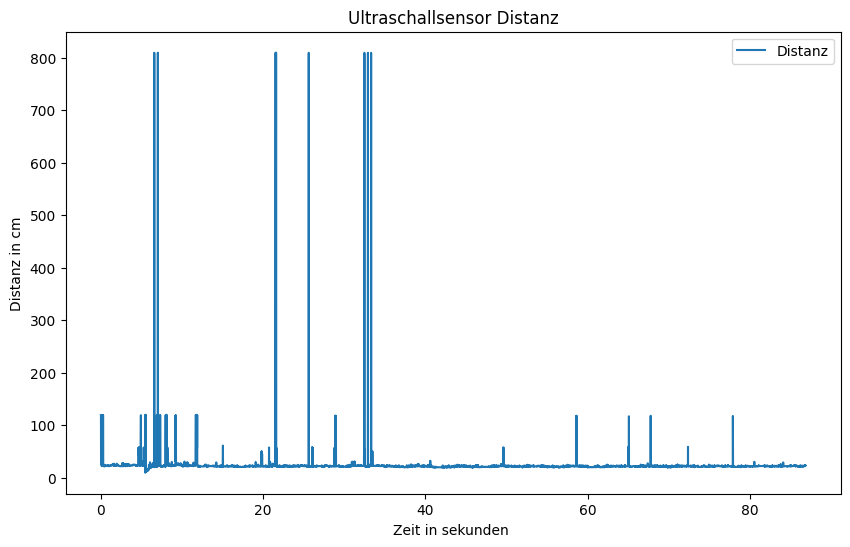

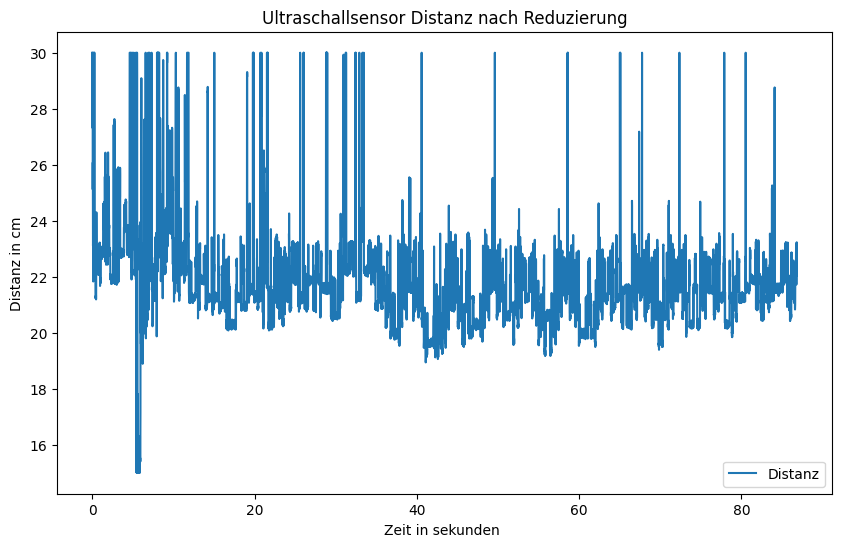

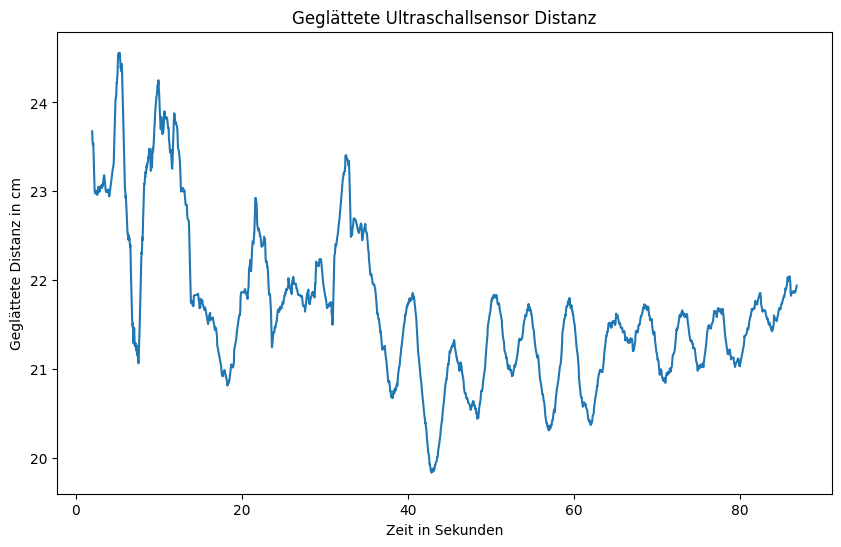

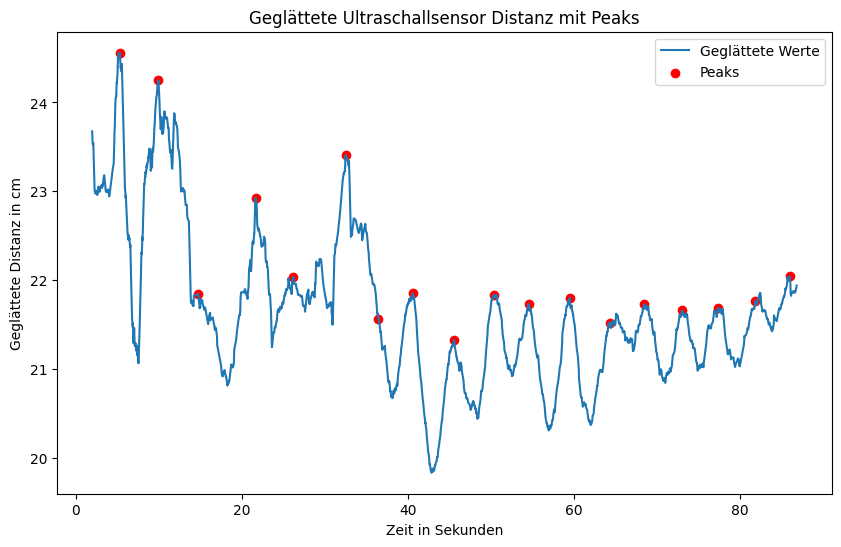

Atemfrequenz: 12.44 Atemzüge pro Minute


In [39]:
data = pd.read_csv('Messung/echo10MaleinausBrust.csv', header=None, sep=';')

data.columns = ['x']

# Zugriff auf die Daten pro Spalte
x_values = data['x'].values

print(len(x_values))

time = np.arange(0, len(x_values))*0.01



plt.figure(figsize=(10,6))
plt.plot(time,x_values, label='Distanz')
plt.xlabel('Zeit in sekunden ')  # Label für die X-Achse
plt.ylabel('Distanz in cm')  # Label für die Y-Achse
plt.title('Ultraschallsensor Distanz')  # Titel des Plots
plt.legend()
plt.show()

# Definieren Sie die untere und obere Grenze für die Werte, die Sie behalten möchten
lower_bound = 15
upper_bound = 30

# Ersetzen Sie Werte, die über der oberen Grenze liegen, durch die obere Grenze
x_values_clipped = np.where(x_values > upper_bound, upper_bound, x_values)

# Ersetzen Sie Werte, die unter der unteren Grenze liegen, durch die untere Grenze
x_values_clipped = np.where(x_values_clipped < lower_bound, lower_bound, x_values_clipped)

# Zeigen Sie die gefilterten Werte an
plt.figure(figsize=(10,6))
plt.plot(time,x_values_clipped, label='Distanz')
plt.xlabel('Zeit in sekunden ')  # Label für die X-Achse
plt.ylabel('Distanz in cm')  # Label für die Y-Achse
plt.title('Ultraschallsensor Distanz nach Reduzierung')  # Titel des Plots
plt.legend()
plt.show()

# Konvertieren Sie die gefilterten Werte in eine Pandas-Serie
x_values_filtered_series = pd.Series(x_values_clipped)

# Berechnen Sie den gleitenden Durchschnitt mit einem Fenster der Größe 5
x_values_smooth = x_values_filtered_series.rolling(window=200).mean()

x_values_smooth = np.array(x_values_smooth)


plt.figure(figsize=(10,6))
plt.plot(time, x_values_smooth)
plt.xlabel('Zeit in Sekunden')  # Label für die X-Achse
plt.ylabel('Geglättete Distanz in cm')  # Label für die Y-Achse
plt.title('Geglättete Ultraschallsensor Distanz')  # Titel des Plots
plt.show()




peaks,_ = find_peaks(x_values_smooth, height=20, distance=380)


# Zeigen Sie die geglätteten Werte an
fig = go.Figure()
fig.add_trace(go.Scatter(x=time, y=x_values_smooth, mode='lines', name='Smoothed Values'))

# Fügen Sie die Peaks hinzu
fig.add_trace(go.Scatter(x=time[peaks], y=x_values_smooth[peaks], mode='markers', name='Peaks'))

fig.show()

# ...

# Erstellen Sie ein Matplotlib-Diagramm
plt.figure(figsize=(10,6))
plt.plot(time, x_values_smooth, label='Geglättete Werte')  # Zeigen Sie die geglätteten Werte an
plt.scatter(time[peaks], x_values_smooth[peaks], color='red', label='Peaks')  # Fügen Sie die Peaks hinzu
plt.xlabel('Zeit in Sekunden')  # Label für die X-Achse
plt.ylabel('Geglättete Distanz in cm')  # Label für die Y-Achse
plt.title('Geglättete Ultraschallsensor Distanz mit Peaks')  # Titel des Plots
plt.legend()
plt.show()

# Berechnen Sie die Atemfrequenz (in Atemzügen pro Minute)
breathing_rate = len(peaks) / (time[-1]/60) 
print(f"Atemfrequenz: {breathing_rate:.2f} Atemzüge pro Minute")


# Verusch 3 Mikro

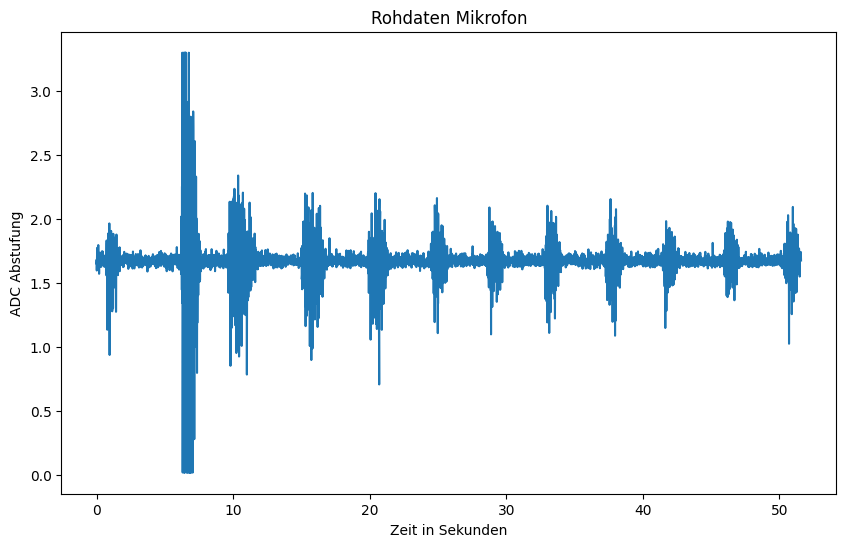

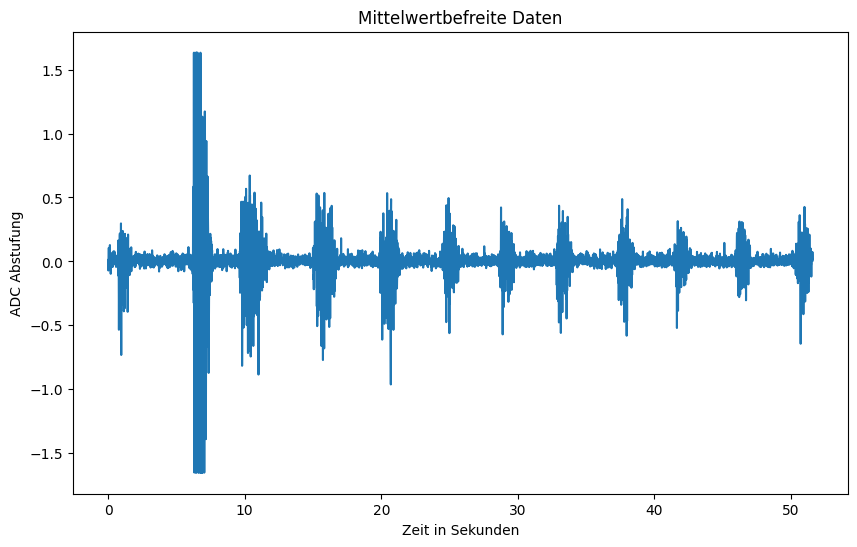

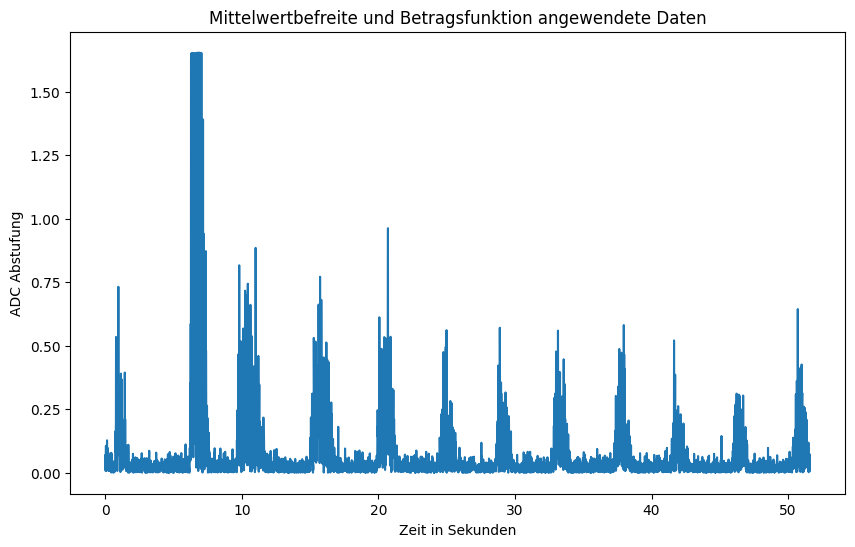

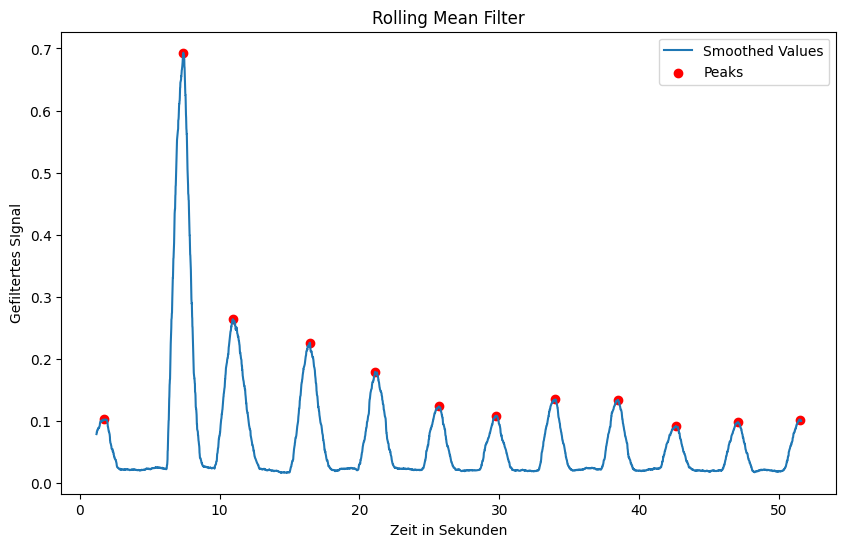

Atemfrequenz: 13.96 Atemzüge pro Minute


In [40]:


data = pd.read_csv('Messung/Mikro_10Atmungen.csv', header=None, sep=';')

data.columns = ['x']

# Zugriff auf die Daten pro Spalte
x_values = data['x'].values

time = np.arange(0, len(x_values))*0.01

plt.figure(figsize=(10,6))
plt.plot(time, x_values)
plt.xlabel('Zeit in Sekunden')  # X-axis label
plt.ylabel('ADC Abstufung')  # Y-axis label
plt.title('Rohdaten Mikrofon')  # Plot title
plt.show()

# Berechnen Sie den Mittelwert der x_values
mean_x_values = np.mean(x_values)

# Subtrahieren Sie den Mittelwert von den x_values
x_values_centered = x_values - mean_x_values

# Erstellen Sie den Plot
plt.figure(figsize=(10,6))
plt.plot(time, x_values_centered)
plt.xlabel('Zeit in Sekunden')  # X-axis label
plt.ylabel('ADC Abstufung')  # Y-axis label
plt.title('Mittelwertbefreite Daten')  # Plot title
plt.show()



#Betragsfunktion
for x in range (len(x_values_centered)):
    if x_values_centered[x] > 0:
        continue
    else:
        x_values_centered[x] = -x_values_centered[x]
# Erstellen Sie den Plot
plt.figure(figsize=(10,6))
plt.plot(time, x_values_centered)
plt.xlabel('Zeit in Sekunden')  # X-axis label
plt.ylabel('ADC Abstufung')  # Y-axis label
plt.title('Mittelwertbefreite und Betragsfunktion angewendete Daten')  # Plot title
plt.show()

x_values_smooth = pd.Series(x_values_centered).rolling(window=120).mean()


peaks,_ = find_peaks(x_values_smooth, height=0.09, distance=200)

fig = go.Figure()
fig.add_trace(go.Scatter(x=time, y=x_values_smooth, mode='lines', name='Smoothed Values'))

# Fügen Sie die Peaks hinzu
fig.add_trace(go.Scatter(x=time[peaks], y=x_values_smooth[peaks], mode='markers', name='Peaks'))

fig.show()


plt.figure(figsize=(10,6))
plt.plot(time, x_values_smooth, label='Smoothed Values')  # Plot der geglätteten Werte
plt.scatter(time[peaks], x_values_smooth[peaks], color='red', label='Peaks')  # Plot der Peaks
plt.xlabel('Zeit in Sekunden')  # X-axis label
plt.ylabel('Gefiltertes SIgnal')  # Y-axis label
plt.title('Rolling Mean Filter')  # Plot title
plt.legend()  # Add a legend
plt.show()

# Berechnen Sie die Atemfrequenz (in Atemzügen pro Minute)

breathing_rate = len(peaks) / (time[-1]/60)
print(f"Atemfrequenz: {breathing_rate:.2f} Atemzüge pro Minute")



# Verusche 4 PPG

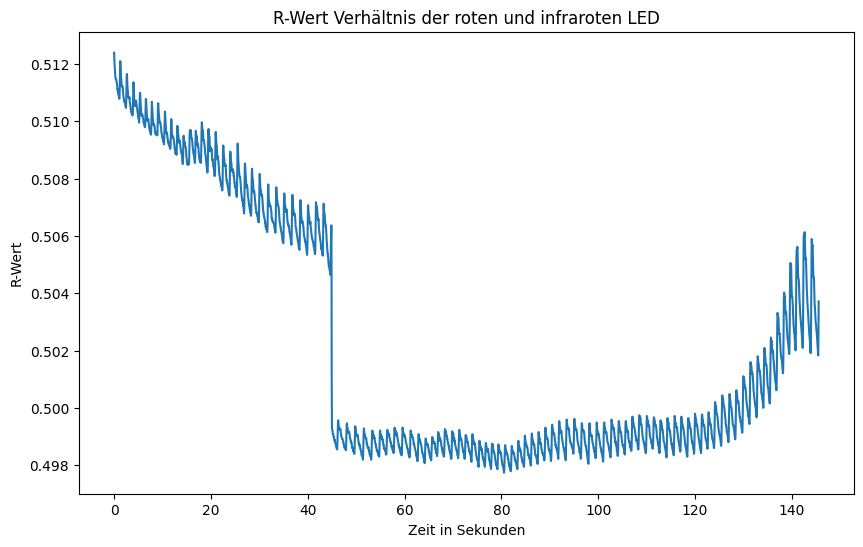

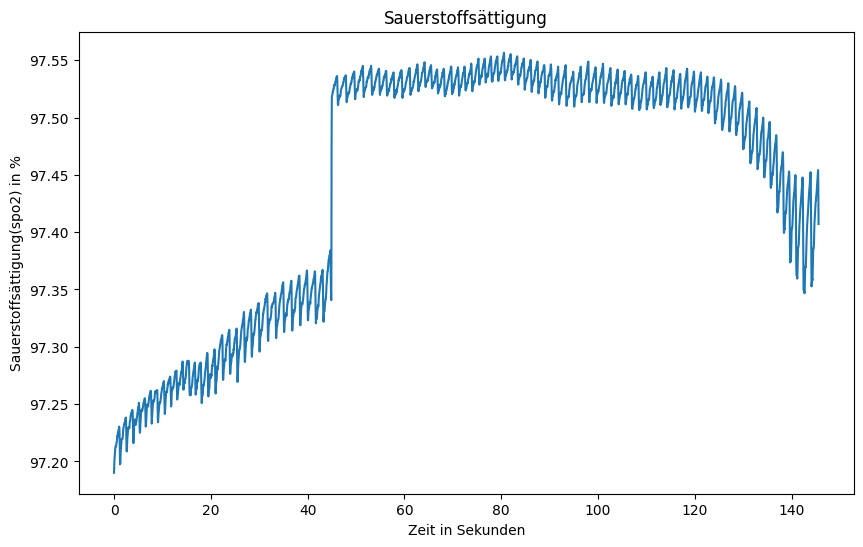

atmung gefiltert


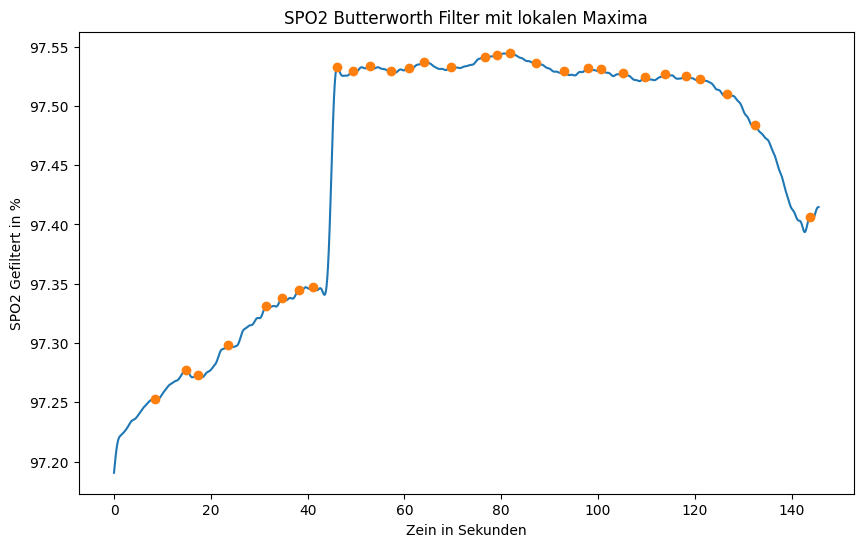

Atemfrequenz: 12.37 Atemzüge pro Minute


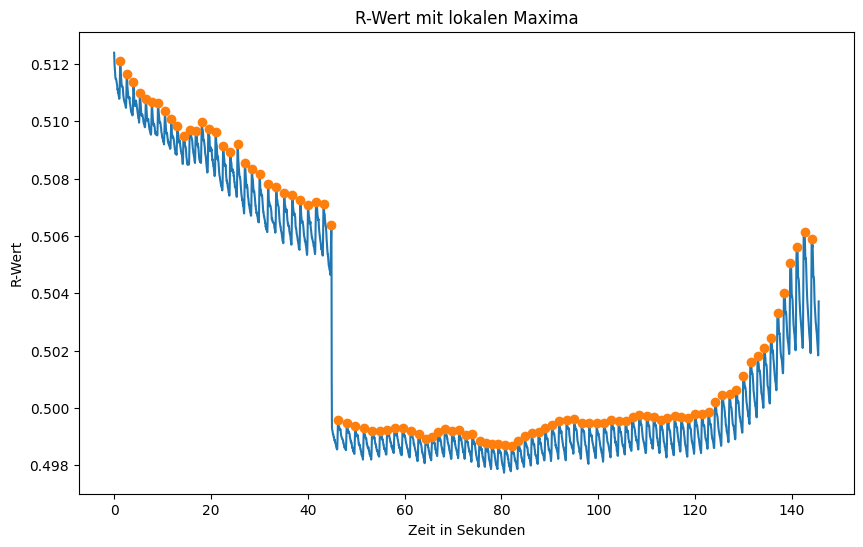

Herzfrequenz: 81.62 Herzschläge pro Minute


In [41]:
data = pd.read_csv('Messung/Sauerstoffsätigung.csv', header=None, sep=',')
data.columns = ['x','y']

# Zugriff auf die Daten pro Spalte
x_values = data['x'].values
y_values = data['y'].values

time = np.arange(0, len(x_values))*0.05

r = x_values/y_values

spo2 = 110 - 25*r

plt.figure(figsize=(10,6))
plt.plot(time,r)
plt.title("R-Wert Verhältnis der roten und infraroten LED") 
plt.xlabel('Zeit in Sekunden')  # X-axis label
plt.ylabel('R-Wert')  # Y-axis label
plt.show()

plt.figure(figsize=(10,6))
plt.plot(time,spo2)
plt.title("Sauerstoffsättigung")
plt.xlabel('Zeit in Sekunden')  # X-axis label
plt.ylabel('Sauerstoffsättigung(spo2) in %')  # Y-axis label
plt.show()



# Definieren Sie die Filterparameter
N = 3  # Ordnung des Filters
Wn = 0.04  # Grenzfrequenz, 0 < Wn < 1

# Berechnen Sie die Filterkoeffizienten
b, a = butter(N, Wn)

# Wenden Sie den Filter auf die Daten an
spo2_filtered = filtfilt(b, a, spo2)
print("atmung gefiltert")
# Zeigen Sie die gefilterten Daten an

fig = go.Figure()
fig.add_trace(go.Scatter(x=time, y=spo2_filtered, mode='lines', name='Smoothed Values'))

fig.show()

peaks,_ = find_peaks(spo2_filtered, height=0.4, distance=40)

fig = go.Figure()
fig.add_trace(go.Scatter(x=time, y=spo2_filtered, mode='lines', name='Smoothed Values'))

# Fügen Sie die Peaks hinzu
fig.add_trace(go.Scatter(x=time[peaks], y=spo2_filtered[peaks], mode='markers', name='Peaks'))

fig.show()


peaks,_ = find_peaks(spo2_filtered, height=0.4, distance=40)

# Erstellen Sie den Plot
plt.figure(figsize=(10,6))
plt.plot(time, spo2_filtered, label='Smoothed Values')

# Fügen Sie die Peaks hinzu
plt.plot(time[peaks], spo2_filtered[peaks], 'o', label='Peaks')

# Fügen Sie Achsenbeschriftungen und einen Titel hinzu
plt.xlabel('Zein in Sekunden')
plt.ylabel('SPO2 Gefiltert in %')
plt.title('SPO2 Butterworth Filter mit lokalen Maxima')


# Zeigen Sie den Plot an
plt.show()

# Berechnen Sie die Atmungsfrequenz (in Atemzügen pro Minute)
breathing_rate = len(peaks) / (time[-1]/60)
print(f"Atemfrequenz: {breathing_rate:.2f} Atemzüge pro Minute")





peaks,_ = find_peaks(r, height=0.4, distance=20)

fig = go.Figure()
fig.add_trace(go.Scatter(x=time, y=r, mode='lines', name='Smoothed Values'))

# Fügen Sie die Peaks hinzu
fig.add_trace(go.Scatter(x=time[peaks], y=r[peaks], mode='markers', name='Peaks'))

fig.show()



# Erstellen Sie den Plot
plt.figure(figsize=(10,6))
plt.plot(time, r, label='Smoothed Values')

# Fügen Sie die Peaks hinzu
plt.plot(time[peaks], r[peaks], 'o', label='Peaks')

# Fügen Sie Achsenbeschriftungen und einen Titel hinzu
plt.xlabel('Zeit in Sekunden')
plt.ylabel('R-Wert')
plt.title('R-Wert mit lokalen Maxima')


# Zeigen Sie den Plot an
plt.show()

# Berechnen Sie die Herzfrequenz (in Herzschlägen pro Minute)

heart_rate = len(peaks) / (time[-1]/60)*2
print(f"Herzfrequenz: {heart_rate:.2f} Herzschläge pro Minute")










# Versuch 5 EKG

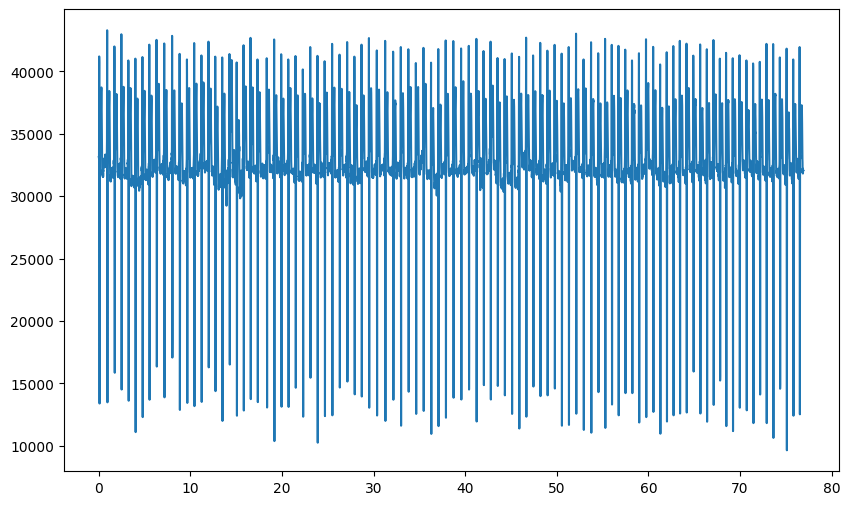

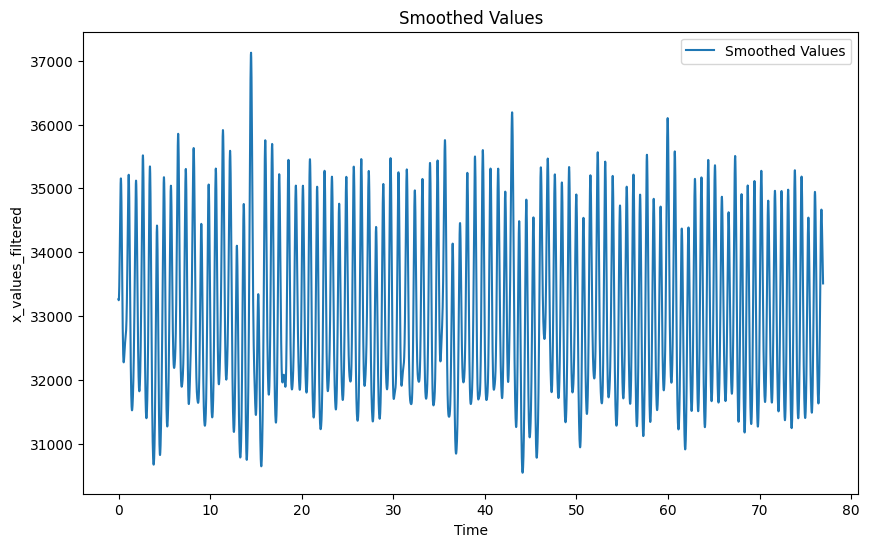

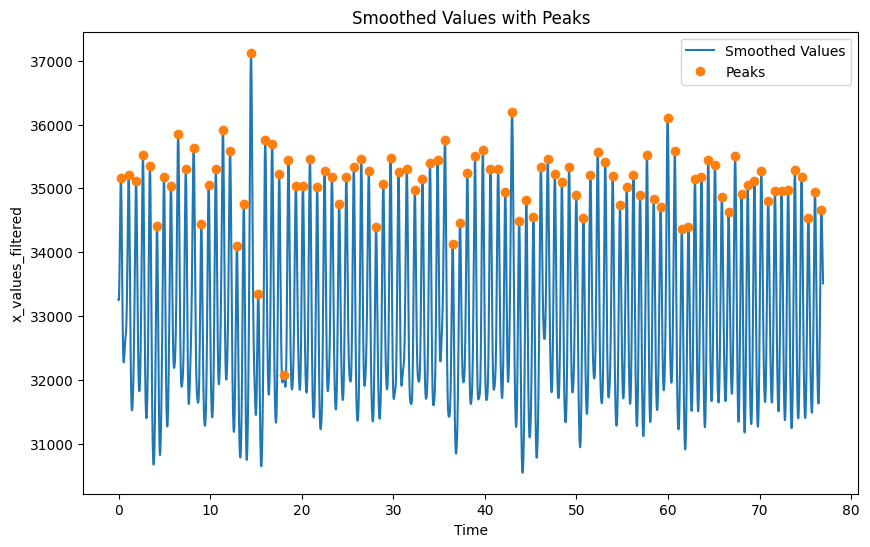

Herzfrequenz: 78.00 Herzschläge pro Minute


In [42]:
data = pd.read_csv('Messung/Ekg.csv', header=None, sep=';')
data.columns = ['x']

# Zugriff auf die Daten pro Spalte

x_values = data['x'].values

time = np.arange(0, len(x_values))*0.01

plt.figure(figsize=(10,6))
plt.plot(time, x_values)
plt.show()

# Definieren Sie die Filterparameter
N = 3  # Ordnung des Filters
Wn = 0.04  # Grenzfrequenz, 0 < Wn < 1

# Berechnen Sie die Filterkoeffizienten
b, a = butter(N, Wn)

# Wenden Sie den Filter auf die Daten an
x_values_filtered = filtfilt(b, a, x_values)

# Zeigen Sie die gefilterten Daten an

import matplotlib.pyplot as plt

# Erstellen Sie den ersten Plot
plt.figure(figsize=(10,6))
plt.plot(time, x_values_filtered, label='Smoothed Values')
plt.xlabel('Time')
plt.ylabel('x_values_filtered')
plt.title('Smoothed Values')
plt.legend()
plt.show()

# Finden Sie die Peaks
peaks,_ = find_peaks(x_values_filtered, height=0.4, distance=20)

# Erstellen Sie den zweiten Plot
plt.figure(figsize=(10,6))
plt.plot(time, x_values_filtered, label='Smoothed Values')

# Fügen Sie die Peaks hinzu
plt.plot(time[peaks], x_values_filtered[peaks], 'o', label='Peaks')

plt.xlabel('Time')
plt.ylabel('x_values_filtered')
plt.title('Smoothed Values with Peaks')
plt.legend()
plt.show()

fig = go.Figure()
fig.add_trace(go.Scatter(x=time, y=x_values_filtered, mode='lines', name='Smoothed Values'))

fig.show()

peaks,_ = find_peaks(x_values_filtered, height=0.4, distance=20)

fig = go.Figure()

fig.add_trace(go.Scatter(x=time, y=x_values_filtered, mode='lines', name='Smoothed Values'))

# Fügen Sie die Peaks hinzu

fig.add_trace(go.Scatter(x=time[peaks], y=x_values_filtered[peaks], mode='markers', name='Peaks'))

fig.show()

# Berechnen Sie die Herzfrequenz (in Herzschlägen pro Minute)

heart_rate = len(peaks) / (time[-1]/60)
print(f"Herzfrequenz: {heart_rate:.2f} Herzschläge pro Minute")

